<a href="https://colab.research.google.com/github/Rysin09/Netflix-Dataset-EDA/blob/main/Netflix-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Netflix Exploratory Data Analysis**
*Welcome to this mini capstone project where we deep-dive into the vast world of Netflix content through **Exploratory Data Analysis (EDA)**. Netflix, being one of the top OTT platforms globally, holds a treasure trove of data that can reveal interesting trends, patterns, and insights.*


---
### **Project Objective**

The goal of this project is to explore and analyze the Netflix dataset to uncover insights such as:
- 📅 How has the content evolved over the years?
- 🌍 Which countries contribute the most content?
- 🎭 What are the most popular genres?
- 🔞 How is content distributed across different ratings?
- ⏱️ Duration trends between Movies and TV Shows

---

### **Tools & Libraries Used**

- **Python**
- **Pandas**, **NumPy** – for data manipulation
- **Matplotlib** – for data visualization
- **Google Colab** – for interactive development environment

---

### **Key Deliverables**

- Cleaned and well-structured dataset
- Visual insights using plots and graphs
- Answers to interesting analytical questions
- Final observations and summary of findings




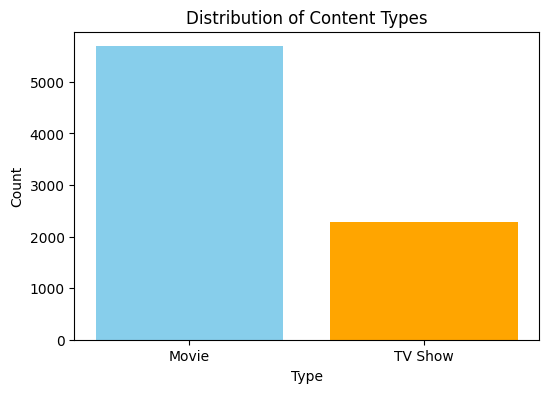

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Data Frame
df = pd.read_csv('/content/netflix_titles.csv')

df = df.dropna(subset=['type', 'release_year', 'country', 'rating', 'duration'])
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))

plt.bar(type_counts.index, type_counts.values, color = ['skyblue', 'orange'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.savefig('type_distribution.png')
plt.show()

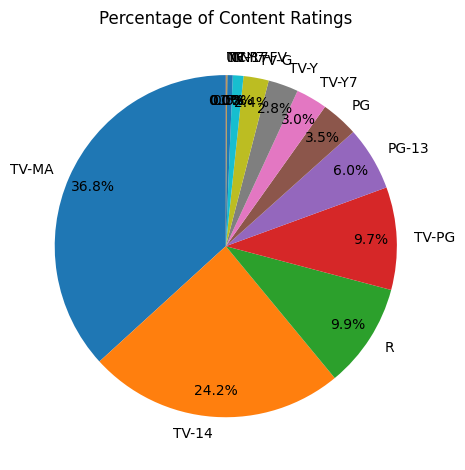

In [ ]:
rating_counts = df['rating'].value_counts()

plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Percentage of Content Ratings')
plt.savefig('rating_distribution.png')
plt.tight_layout()
plt.show()

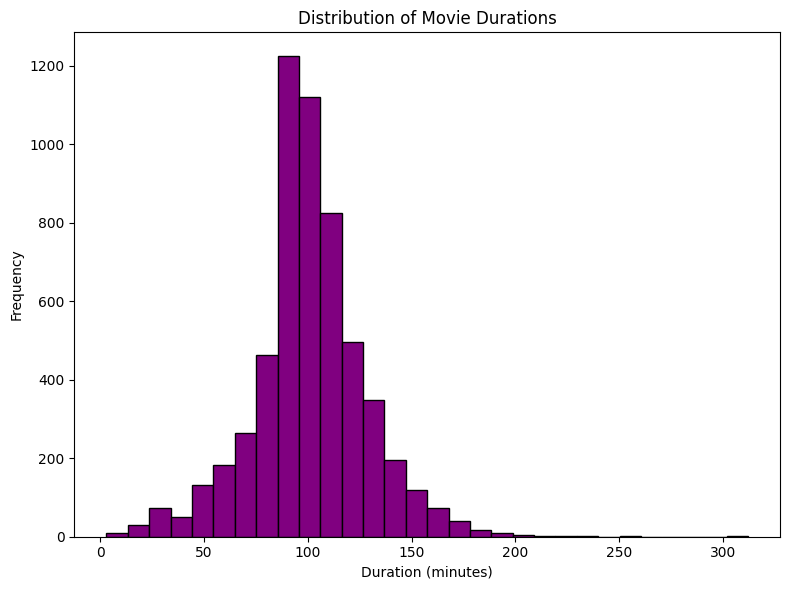

In [ ]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.tight_layout()
plt.savefig('movie_duration_distribution.png')
plt.show()

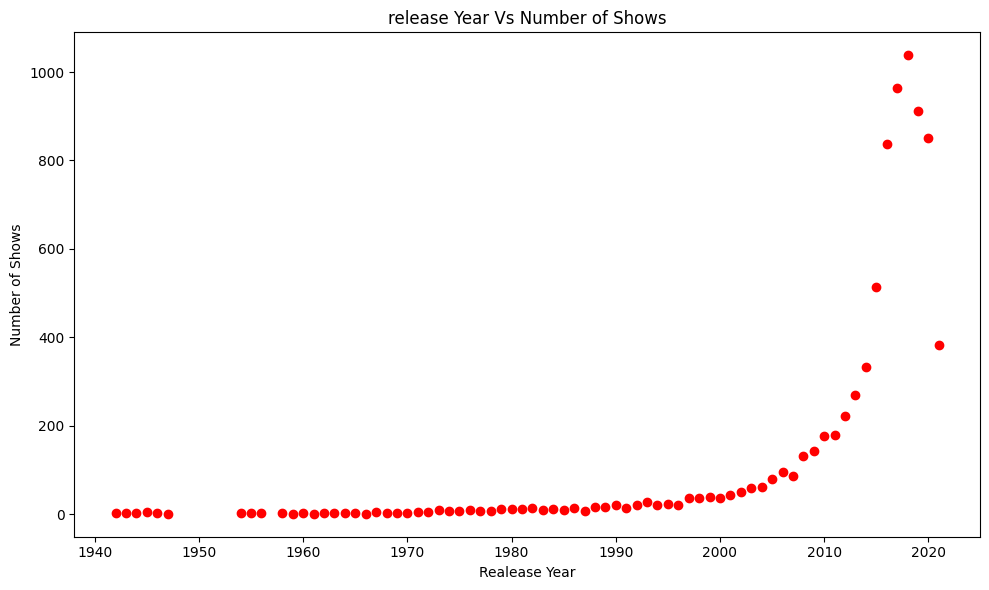

In [ ]:
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index, release_count.values, marker='o', linestyle='-', color='red')
plt.xlabel('Realease Year')
plt.ylabel('Number of Shows')
plt.title('release Year Vs Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

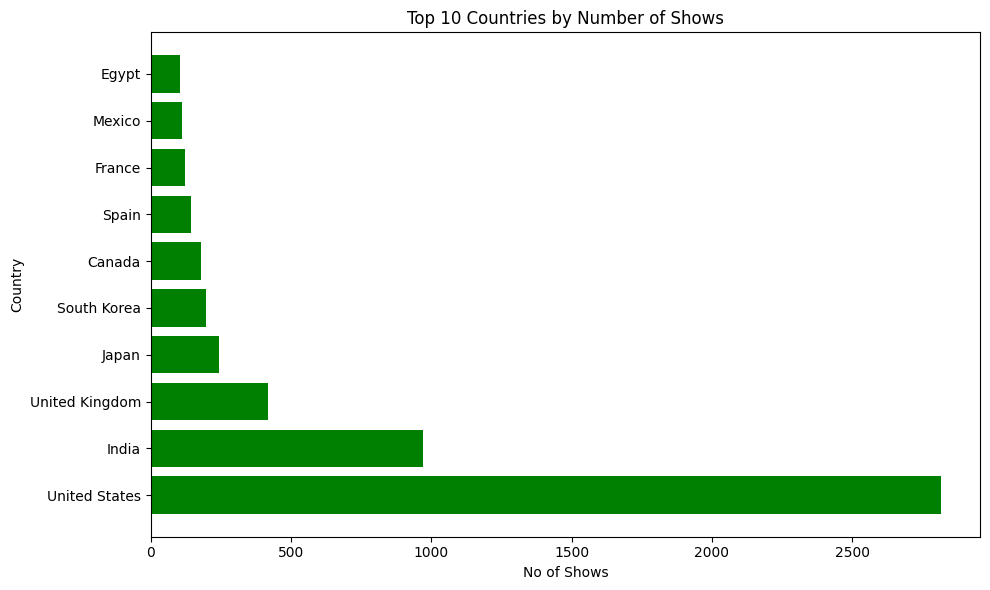

In [ ]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color='green')
plt.xlabel('No of Shows')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Shows')
plt.tight_layout()
plt.savefig('top10countries.png')
plt.show()

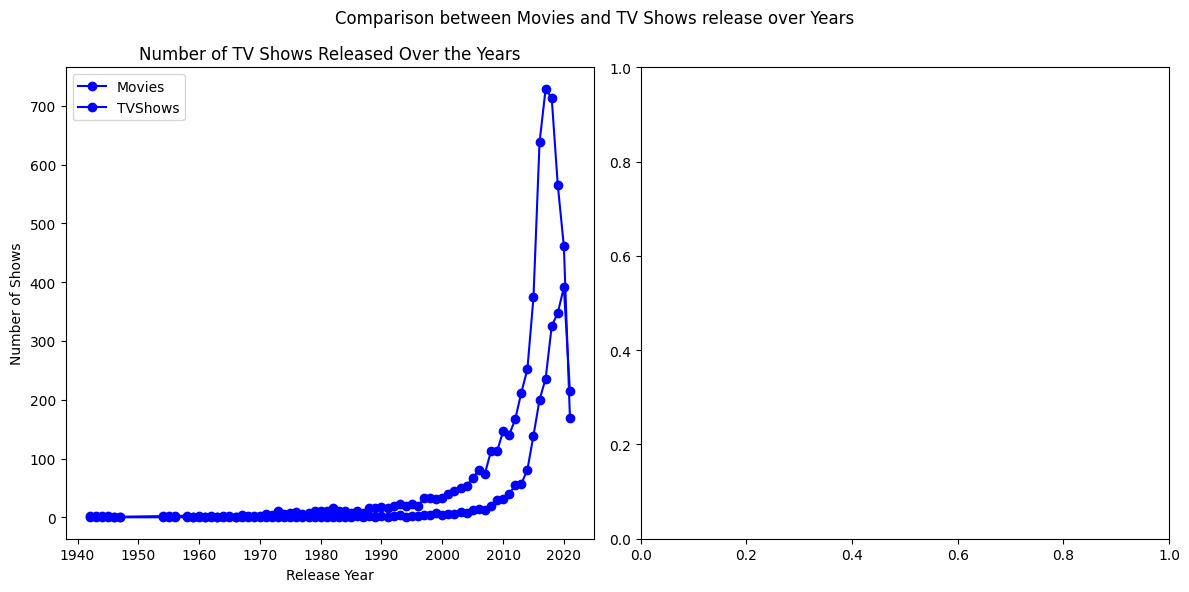

In [ ]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(content_by_year.index, content_by_year['Movie'], marker='o', linestyle='-', color='blue', label='Movies')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies Released Over the Years')
ax[0].legend()

ax[0].plot(content_by_year.index, content_by_year['TV Show'], marker='o', linestyle='-', color='blue', label='TVShows')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Shows')
ax[0].set_title('Number of TV Shows Released Over the Years')
ax[0].legend()

fig.suptitle('Comparison between Movies and TV Shows release over Years')
plt.tight_layout()
plt.savefig('content_by_year.png')
plt.show()